In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import numpy as np
from helper import p_values, p_values_ras, p_values_wilcoxon, p_values_ras_wilcoxon

In [33]:
true_to_seires = pd.read_csv('../output/inv_y_rnn.csv', index_col=0)
print(true_to_seires.shape)

true_to_seires = true_to_seires.iloc[-17521:, :]
print(true_to_seires.shape)

(19249, 96)
(17521, 96)


In [34]:
# sum(true_to_seires.values - true_to_seires2.values)

In [35]:
lr_raw = pd.read_csv('../output/inv_yhat_lr.csv', index_col=0)
mlp_raw = pd.read_csv('../output/inv_yhat_mlp_noise.csv', index_col=0)
rnn_raw = pd.read_csv('../output/inv_yhat_rnn_noise.csv', index_col=0)
lstm_raw = pd.read_csv('../output/inv_yhat_lstm_noise.csv', index_col=0)
conv_mlp_raw = pd.read_csv('../output/inv_yhat_cnn_noise.csv', index_col=0)
conv_rnn_raw = pd.read_csv('../output/inv_yhat_rcnn_noise.csv', index_col=0)

In [36]:
print(lr_raw.shape, mlp_raw.shape, rnn_raw.shape, lstm_raw.shape, conv_mlp_raw.shape, conv_rnn_raw.shape)

(19249, 96) (19249, 96) (19249, 96) (19249, 96) (19249, 96) (19249, 96)


In [37]:
lr = lr_raw.iloc[-17521:, :]
mlp = mlp_raw.iloc[-17521:, :]
rnn = rnn_raw.iloc[-17521:, :]
lstm = lstm_raw.iloc[-17521:, :]
conv_mlp = conv_mlp_raw.iloc[-17521:, :]
conv_rnn = conv_rnn_raw.iloc[-17521:, :]

In [38]:
print(lr.shape)
print(mlp.shape)
print(rnn.shape)
print(lstm.shape)
print(conv_mlp.shape)
print(conv_rnn.shape)

(17521, 96)
(17521, 96)
(17521, 96)
(17521, 96)
(17521, 96)
(17521, 96)


## volion plot

In [39]:
lr_2yrs_error = lr - true_to_seires
mlp_2yrs_error = mlp - true_to_seires
rnn_2yrs_error = rnn - true_to_seires
lstm_2yrs_error = lstm - true_to_seires
conv_mlp_2yrs_error = conv_mlp - true_to_seires
conv_rnn_2yrs_error = conv_rnn - true_to_seires

In [40]:
print(mlp_2yrs_error.shape)
print(rnn_2yrs_error.shape)
print(lstm_2yrs_error.shape)
print(conv_mlp_2yrs_error.shape)
print(conv_rnn_2yrs_error.shape)

(17521, 96)
(17521, 96)
(17521, 96)
(17521, 96)
(17521, 96)


In [41]:
mlp_2yrs_error = mlp_2yrs_error.reset_index(drop=True)
rnn_2yrs_error = rnn_2yrs_error.reset_index(drop=True)
lstm_2yrs_error = lstm_2yrs_error.reset_index(drop=True)
conv_mlp_2yrs_error = conv_mlp_2yrs_error.reset_index(drop=True)
conv_rnn_2yrs_error = conv_rnn_2yrs_error.reset_index(drop=True)

In [42]:
def concat_df(df, i):
    a = df.iloc[:, i:i+1].values
    b = df.iloc[:, i+1:i+2].values
    c = df.iloc[:, i+2:i+3].values
    d = df.iloc[:, i+3:i+4].values
    e = np.concatenate((a, b, c, d), axis=0)
    dataframe = pd.DataFrame(e)
    return dataframe

In [43]:
mlp_2yrs_error_for_Fig4 = concat_df(mlp_2yrs_error, 0)

In [44]:
mlp_2yrs_error.iloc[:, 0:4].shape

(17521, 4)

### t+1

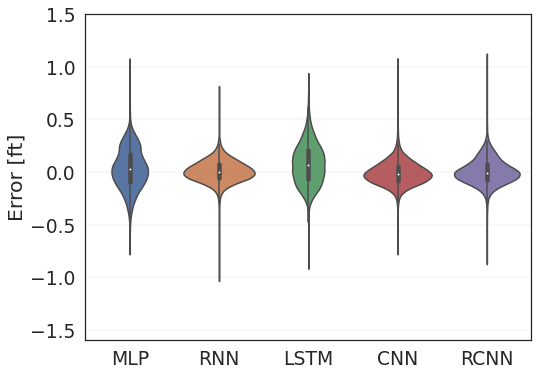

In [45]:
vvv = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN'])
vvv.iloc[:, 0] = concat_df(mlp_2yrs_error, 0)
vvv.iloc[:, 1] = concat_df(rnn_2yrs_error, 0)
vvv.iloc[:, 2] = concat_df(lstm_2yrs_error, 0)
vvv.iloc[:, 3] = concat_df(conv_mlp_2yrs_error, 0)
vvv.iloc[:, 4] = concat_df(conv_rnn_2yrs_error, 0)

plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=vvv[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('Prediction Errors for 1 hour ahead', size = 24)
ax.set_ylim(-1.6, 1.5)

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1.5, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/4.1.png", dpi=200, bbox_inches='tight')

In [46]:
vvv.shape

(70084, 5)

In [47]:
p_values(vvv)

rcnn_mlp: 7.757955782568744e-222
rcnn_rnn: 2.850974180724264e-37
rcnn_lstm: 0.0
rcnn_cnn: 5.504025097328228e-115
Averaging all: 0.022157025998750593


In [48]:
# p_values_wilcoxon(vvv)

In [49]:
# p_values_wilcoxon(np.abs(vvv))

In [50]:
# columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']
# for i in range(len(columns)):
#     print('{} median:'.format(columns[i]), np.median(vvv.iloc[:, i]))

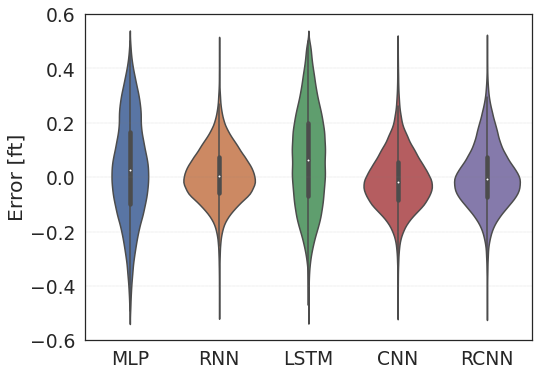

In [51]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']

vvv_dict = {column: vvv[(vvv[column] >= -0.5) & (vvv[column] <= 0.5)][column] for column in columns}
# vv_dict


plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=[vvv_dict['MLP'], vvv_dict['RNN'], vvv_dict['LSTM'], 
                          vvv_dict['CNN'], vvv_dict['RCNN'],
                         ], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('1-hour-ahead', size = 24)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels(columns)  # Provide the correct number of labels

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/4.1_shrink.png", dpi=200, bbox_inches='tight')

### t+8

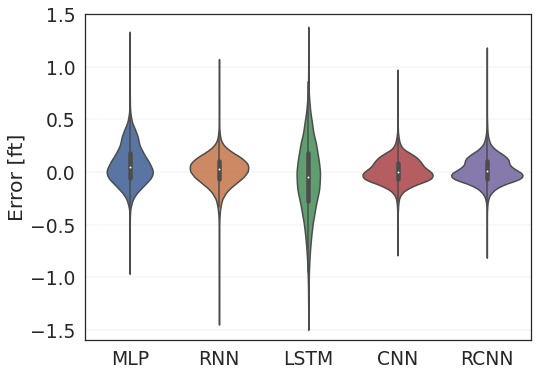

In [52]:
vvv1 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN'])
vvv1.iloc[:, 0] = concat_df(mlp_2yrs_error, 28)
vvv1.iloc[:, 1] = concat_df(rnn_2yrs_error, 28)
vvv1.iloc[:, 2] = concat_df(lstm_2yrs_error, 28)
vvv1.iloc[:, 3] = concat_df(conv_mlp_2yrs_error, 28)
vvv1.iloc[:, 4] = concat_df(conv_rnn_2yrs_error, 28)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=vvv1[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('Prediction Errors for 1 hour ahead', size = 24)
ax.set_ylim(-1.6, 1.5)

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1.5, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/4.2.png", dpi=200, bbox_inches='tight')

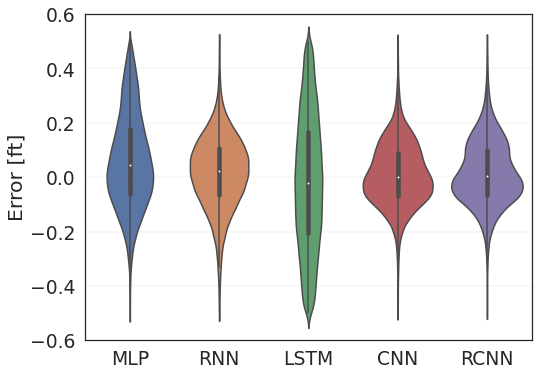

In [53]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']

vvv1_dict = {column: vvv1[(vvv1[column] >= -0.5) & (vvv1[column] <= 0.5)][column] for column in columns}
# vv_dict


plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=[vvv1_dict['MLP'], vvv1_dict['RNN'], vvv1_dict['LSTM'], 
                          vvv1_dict['CNN'], vvv1_dict['RCNN'],
                         ], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('8-hour-ahead', size = 24)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels(columns)  # Provide the correct number of labels

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/4.2_shrink.png", dpi=200, bbox_inches='tight')

In [54]:
p_values(vvv1)

rcnn_mlp: 0.0
rcnn_rnn: 1.7827492777487265e-14
rcnn_lstm: 0.0
rcnn_cnn: 7.98437862650427e-28
Averaging all: 0.010375302474198914


In [55]:
# columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']
# for i in range(len(columns)):
#     print('{} median:'.format(columns[i]), np.median(vvv1.iloc[:, i]))

### t+16

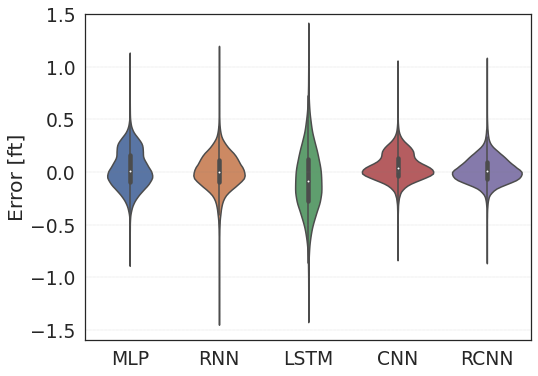

In [56]:
vvv2 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN'])
vvv2.iloc[:, 0] = concat_df(mlp_2yrs_error, 60)
vvv2.iloc[:, 1] = concat_df(rnn_2yrs_error, 60)
vvv2.iloc[:, 2] = concat_df(lstm_2yrs_error, 60)
vvv2.iloc[:, 3] = concat_df(conv_mlp_2yrs_error, 60)
vvv2.iloc[:, 4] = concat_df(conv_rnn_2yrs_error, 60)

ax = sns.violinplot(data=vvv2[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('Prediction Errors for 1 hour ahead', size = 24)
ax.set_ylim(-1.6, 1.5)

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1.5, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/4.3.png", dpi=200, bbox_inches='tight')

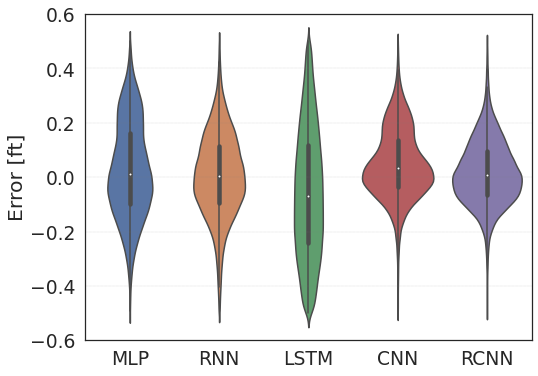

In [57]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']

vvv2_dict = {column: vvv2[(vvv2[column] >= -0.5) & (vvv2[column] <= 0.5)][column] for column in columns}
# vv_dict


plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=[vvv2_dict['MLP'], vvv2_dict['RNN'], vvv2_dict['LSTM'], 
                          vvv2_dict['CNN'], vvv2_dict['RCNN'],
                         ], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('16-hour-ahead', size = 24)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels(columns)  # Provide the correct number of labels

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/4.3_shrink.png", dpi=200, bbox_inches='tight')

In [58]:
p_values(vvv2)

rcnn_mlp: 4.6652025659312e-10
rcnn_rnn: 4.464825102327986e-36
rcnn_lstm: 0.0
rcnn_cnn: 0.0
Averaging all: 0.005571851548118868


In [59]:
# columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']
# for i in range(len(columns)):
#     print('{} median:'.format(columns[i]), np.median(vvv2.iloc[:, i]))

### t+24

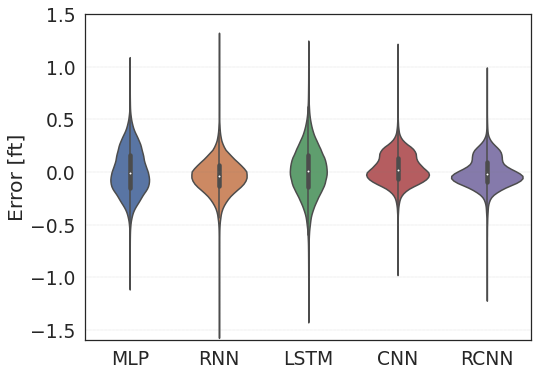

In [60]:
vvv3 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN'])
vvv3.iloc[:, 0] = concat_df(mlp_2yrs_error, 92)
vvv3.iloc[:, 1] = concat_df(rnn_2yrs_error, 92)
vvv3.iloc[:, 2] = concat_df(lstm_2yrs_error, 92)
vvv3.iloc[:, 3] = concat_df(conv_mlp_2yrs_error, 92)
vvv3.iloc[:, 4] = concat_df(conv_rnn_2yrs_error, 92)

ax = sns.violinplot(data=vvv3[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('Prediction Errors for 1 hour ahead', size = 24)
ax.set_ylim(-1.6, 1.5)

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1.5, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/4.4.png", dpi=200, bbox_inches='tight')

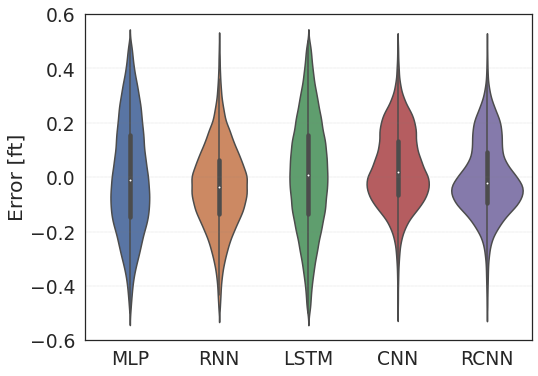

In [61]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']

vvv3_dict = {column: vvv3[(vvv3[column] >= -0.5) & (vvv3[column] <= 0.5)][column] for column in columns}
# vv_dict


plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=[vvv3_dict['MLP'], vvv3_dict['RNN'], vvv3_dict['LSTM'], 
                          vvv3_dict['CNN'], vvv3_dict['RCNN'],
                         ], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('24-hour-ahead', size = 24)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels(columns)  # Provide the correct number of labels

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/4.4_shrink.png", dpi=200, bbox_inches='tight')

In [62]:
p_values(vvv3)

rcnn_mlp: 0.30256146467874223
rcnn_rnn: 0.0
rcnn_lstm: 5.917246172847901e-40
rcnn_cnn: 0.0
Averaging all: 0.0015268078251073408


In [32]:
# columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN']
# for i in range(len(columns)):
#     print('{} median:'.format(columns[i]), np.median(vvv3.iloc[:, i]))

## Violin plot vs locations

In [83]:
hecras = pd.read_csv('../data/task-2.csv')
hecras

,Unnamed: 0,S1 OBS,T1 RAS,T2 RAS S1,S25A_TW OBS,T2 RAS S25A,S25B_TW OBS,T2 RAS S25B,S26_TW OBS,RAS S26
0,1/1/2019 0:00,-0.32,-0.37,-0.54,-0.31,-0.54,-0.28,-0.53,-0.30,-0.54
1,1/1/2019 0:10,-0.27,-0.37,-0.45,-0.28,-0.45,-0.25,-0.46,-0.25,-0.48
2,1/1/2019 0:20,-0.21,-0.35,-0.36,-0.21,-0.36,-0.18,-0.36,-0.19,-0.37
3,1/1/2019 0:30,-0.12,-0.28,-0.28,-0.14,-0.29,-0.10,-0.27,-0.12,-0.27
4,1/1/2019 0:40,-0.04,-0.17,-0.20,-0.04,-0.19,-0.02,-0.20,-0.02,-0.19
...,...,...,...,...,...,...,...,...,...,...
105109,12/30/2020 22:10,2.05,1.93,1.81,2.04,1.80,2.17,1.83,2.13,1.86
105110,12/30/2020 22:20,1.99,1.85,1.71,2.01,1.70,2.10,1.74,2.07,1.78
105111,12/30/2020 22:30,1.92,1.77,1.61,1.93,1.61,2.02,1.63,1.98,1.66
105112,12/30/2020 22:40,1.83,1.71,1.52,1.81,1.52,1.96,1.54,1.93,1.55


In [84]:
hecras['Time'] = pd.to_datetime(hecras['Unnamed: 0'])
hecras = hecras.drop(['Unnamed: 0'], axis=1)
hecras = hecras.set_index('Time')

In [85]:
hecras = hecras.resample('1H').ffill()
hecras

,S1 OBS,T1 RAS,T2 RAS S1,S25A_TW OBS,T2 RAS S25A,S25B_TW OBS,T2 RAS S25B,S26_TW OBS,RAS S26
Time,,,,,,,,,
2019-01-01 00:00:00,-0.32,-0.37,-0.54,-0.31,-0.54,-0.28,-0.53,-0.30,-0.54
2019-01-01 01:00:00,0.17,0.13,-0.05,0.14,-0.05,0.19,-0.05,0.19,-0.05
2019-01-01 02:00:00,0.80,0.67,0.62,0.76,0.61,0.83,0.63,0.80,0.63
2019-01-01 03:00:00,1.26,1.18,1.09,1.27,1.10,1.31,1.10,1.28,1.08
2019-01-01 04:00:00,1.68,1.53,1.51,1.67,1.53,1.70,1.51,1.69,1.52
...,...,...,...,...,...,...,...,...,...
2020-12-30 18:00:00,1.14,1.16,1.13,1.18,1.14,1.17,1.13,1.25,1.14
2020-12-30 19:00:00,1.62,1.49,1.67,1.65,1.67,1.70,1.69,1.67,1.67
2020-12-30 20:00:00,1.93,1.94,1.94,1.95,1.93,2.00,1.95,2.00,1.91


In [86]:
hecras.to_csv('../data/ras_1920.csv')

In [599]:
ras = hecras[['T2 RAS S1','T2 RAS S25A', 'T2 RAS S25B', 'RAS S26']]
obs = hecras[['S1 OBS', 'S25A_TW OBS' , 'S25B_TW OBS', 'S26_TW OBS']]

In [600]:
mlp_1920 = mlp.iloc[-17521:-2, :]
rnn_1920 = rnn.iloc[-17521:-2, :]
lstm_1920 = lstm.iloc[-17521:-2, :]
conv_mlp_1920 = conv_mlp.iloc[-17521:-2, :]
conv_rnn_1920 = conv_rnn.iloc[-17521:-2, :]

In [601]:
mlp_1920_np = mlp_1920.values
rnn_1920_np = rnn_1920.values
lstm_1920_np = lstm_1920.values
conv_mlp_1920_np = conv_mlp_1920.values
conv_rnn_1920_np = conv_rnn_1920.values

ras_np = ras.values
obs_np = obs.values

In [602]:
mlp_1920_error1 = mlp_2yrs_error.iloc[:-2, 0:4]
rnn_1920_error1 = rnn_2yrs_error.iloc[:-2, 0:4]
lstm_1920_error1 = lstm_2yrs_error.iloc[:-2, 0:4]
conv_mlp_1920_error1 = conv_mlp_2yrs_error.iloc[:-2, 0:4]
conv_rnn_1920_error1 = conv_rnn_2yrs_error.iloc[:-2, 0:4]
ras_1920_error1 = ras_np[:, 0:4] - obs_np[:, 0:4]

In [603]:
mlp_1920_error1 = mlp_1920_error1.values
rnn_1920_error1 = rnn_1920_error1.values
lstm_1920_error1 = lstm_1920_error1.values
conv_mlp_1920_error1 = conv_mlp_1920_error1.values
conv_rnn_1920_error1 = conv_rnn_1920_error1.values

/tmp/ipykernel_10249/2188059784.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vv.iloc[:, 1] = rnn_1920_error1[:, 0]
/tmp/ipykernel_10249/2188059784.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vv.iloc[:, 2] = lstm_1920_error1[:, 0]
/tmp/ipykernel_10249/2188059784.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, ne

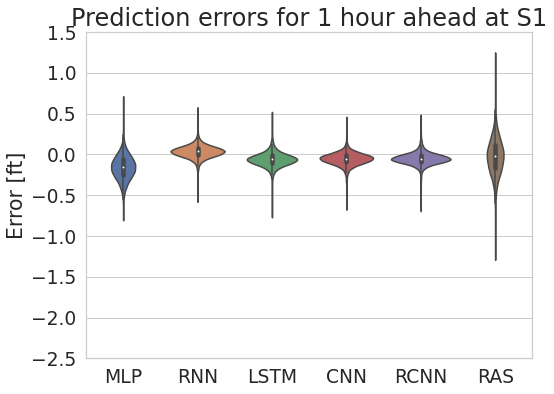

In [125]:
vv = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
vv.iloc[:, 0] = mlp_1920_error1[:, 0]
vv.iloc[:, 1] = rnn_1920_error1[:, 0]
vv.iloc[:, 2] = lstm_1920_error1[:, 0]
vv.iloc[:, 3] = conv_mlp_1920_error1[:, 0]
vv.iloc[:, 4] = conv_rnn_1920_error1[:, 0]
vv.iloc[:, 5] = ras_1920_error1[:, 0]

sns.set(style = 'whitegrid')
sns.set_theme(style="whitegrid", font_scale=1.7)
ax = sns.violinplot(data=vv[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
ax.set_title('Prediction errors for 1 hour ahead at S1', size = 24)
ax.set_ylim(-2.5, 1.5)

scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/5.1.png")

In [81]:
p_values_ras(vv)

ras_mlp: 0.0
ras_rnn: 2.244839165162344e-234
ras_lstm: 6.85309668532274e-100
ras_cnn: 1.815518889953155e-72
ras_rcnn: 3.74799422148885e-58
Averaging all: -0.051639056804855546


/tmp/ipykernel_10249/359095741.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vv1.iloc[:, 1] = rnn_1920_error1[:, 1]
/tmp/ipykernel_10249/359095741.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vv1.iloc[:, 2] = lstm_1920_error1[:, 1]
/tmp/ipykernel_10249/359095741.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, new

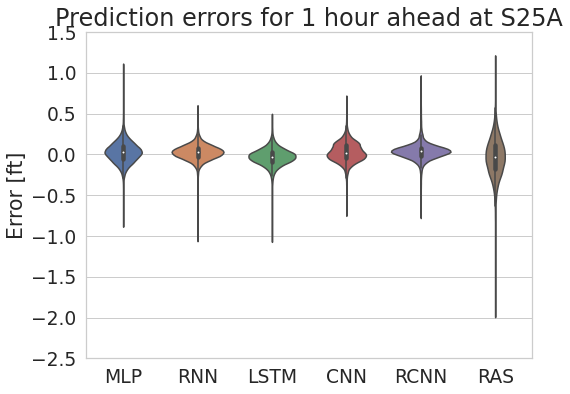

In [98]:
vv1 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
vv1.iloc[:, 0] = mlp_1920_error1[:, 1]
vv1.iloc[:, 1] = rnn_1920_error1[:, 1]
vv1.iloc[:, 2] = lstm_1920_error1[:, 1]
vv1.iloc[:, 3] = conv_mlp_1920_error1[:, 1]
vv1.iloc[:, 4] = conv_rnn_1920_error1[:, 1]
vv1.iloc[:, 5] = ras_1920_error1[:, 1]

sns.set(style = 'whitegrid')
sns.set_theme(style="whitegrid", font_scale=1.7)
ax = sns.violinplot(data=vv1[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
ax.set_title('Prediction errors for 1 hour ahead at S25A', size = 24)
ax.set_ylim(-2.5, 1.5)

scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/5.2.png")

In [83]:
p_values_ras(vv1)

ras_mlp: 6.823635628366506e-171
ras_rnn: 4.041147929519992e-193
ras_lstm: 0.7083802698055088
ras_cnn: 1.1305141324093219e-187
ras_rcnn: 2.3667145952359945e-262
Averaging all: 0.010894414198982013


/tmp/ipykernel_16999/2907262920.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vv2.iloc[:, 1] = rnn_1920_error1[:, 2]
/tmp/ipykernel_16999/2907262920.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vv2.iloc[:, 2] = lstm_1920_error1[:, 2]
/tmp/ipykernel_16999/2907262920.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, 

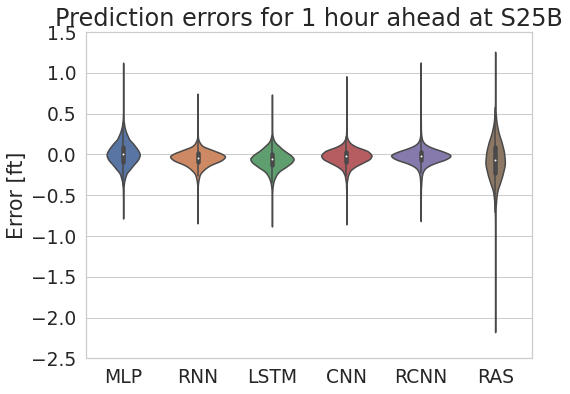

In [84]:
vv2 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
vv2.iloc[:, 0] = mlp_1920_error1[:, 2]
vv2.iloc[:, 1] = rnn_1920_error1[:, 2]
vv2.iloc[:, 2] = lstm_1920_error1[:, 2]
vv2.iloc[:, 3] = conv_mlp_1920_error1[:, 2]
vv2.iloc[:, 4] = conv_rnn_1920_error1[:, 2]
vv2.iloc[:, 5] = ras_1920_error1[:, 2]

sns.set(style = 'whitegrid')
sns.set_theme(style="whitegrid", font_scale=1.7)
ax = sns.violinplot(data=vv2[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
ax.set_title('Prediction errors for 1 hour ahead at S25B', size = 24)
ax.set_ylim(-2.5, 1.5)

scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/5.3.png")

In [85]:
p_values_ras(vv2)

ras_mlp: 2.879677015984539e-240
ras_rnn: 4.837300205020556e-35
ras_lstm: 0.02041860083078743
ras_cnn: 5.43515516529637e-91
ras_rcnn: 1.3511371804431424e-117
Averaging all: -0.03826871310606072


/tmp/ipykernel_16999/3931995368.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vv3.iloc[:, 1] = rnn_1920_error1[:, 3]
/tmp/ipykernel_16999/3931995368.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vv3.iloc[:, 2] = lstm_1920_error1[:, 3]
/tmp/ipykernel_16999/3931995368.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, 

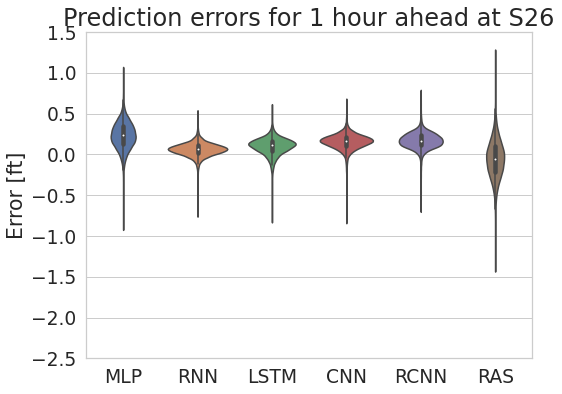

In [86]:
vv3 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
vv3.iloc[:, 0] = mlp_1920_error1[:, 3]
vv3.iloc[:, 1] = rnn_1920_error1[:, 3]
vv3.iloc[:, 2] = lstm_1920_error1[:, 3]
vv3.iloc[:, 3] = conv_mlp_1920_error1[:, 3]
vv3.iloc[:, 4] = conv_rnn_1920_error1[:, 3]
vv3.iloc[:, 5] = ras_1920_error1[:, 3]

sns.set(style = 'whitegrid')
sns.set_theme(style="whitegrid", font_scale=1.7)
ax = sns.violinplot(data=vv3[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
ax.set_title('Prediction errors for 1 hour ahead at S26', size = 24)
ax.set_ylim(-2.5, 1.5)

scatter_fig = ax.get_figure()
# scatter_fig.savefig("figure/5.4.png")

In [363]:
mlp_1920_error24 = mlp_2yrs_error.iloc[:-2, 92:96]
rnn_1920_error24 = rnn_2yrs_error.iloc[:-2, 92:96]
lstm_1920_error24 = lstm_2yrs_error.iloc[:-2, 92:96]
conv_mlp_1920_error24 = conv_mlp_2yrs_error.iloc[:-2, 92:96]
conv_rnn_1920_error24 = conv_rnn_2yrs_error.iloc[:-2, 92:96]
ras_1920_error24 = ras_np[:, 0:4] - obs_np[:, 0:4]

In [364]:
mlp_1920_error24 = mlp_1920_error24.values
rnn_1920_error24 = rnn_1920_error24.values
lstm_1920_error24 = lstm_1920_error24.values
conv_mlp_1920_error24 = conv_mlp_1920_error24.values
conv_rnn_1920_error24 = conv_rnn_1920_error24.values

In [365]:
print(mlp_1920_error24.shape)
print(ras_1920_error24.shape)

(17519, 4)
(17519, 4)


/tmp/ipykernel_10249/2814662616.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vp.iloc[:, 1] = rnn_1920_error24[:, 0]
/tmp/ipykernel_10249/2814662616.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vp.iloc[:, 2] = lstm_1920_error24[:, 0]
/tmp/ipykernel_10249/2814662616.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, 

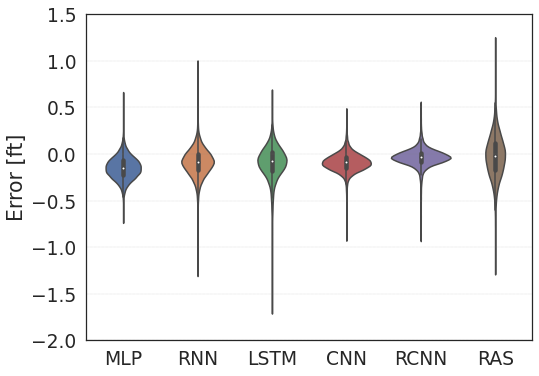

In [211]:
vp = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
vp.iloc[:, 0] = mlp_1920_error24[:, 0]
vp.iloc[:, 1] = rnn_1920_error24[:, 0]
vp.iloc[:, 2] = lstm_1920_error24[:, 0]
vp.iloc[:, 3] = conv_mlp_1920_error24[:, 0]
vp.iloc[:, 4] = conv_rnn_1920_error24[:, 0]
vp.iloc[:, 5] = ras_1920_error24[:, 0]

sns.set(style = 'white')
sns.set_theme(style="white", font_scale=1.7)
ax = sns.violinplot(data=vp[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']], inner='box') # data could be one col or multi cols
# ax.set_title('24 hour ahead at S1', size = 24)
ax.set_ylabel("Error [ft]")
ax.set_ylim(-2, 1.5)

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-2, color='gray', linestyle='--', linewidth=0.15)

scatter_fig = ax.get_figure()
scatter_fig.savefig("figure/6.1.png", dpi=200, bbox_inches='tight')

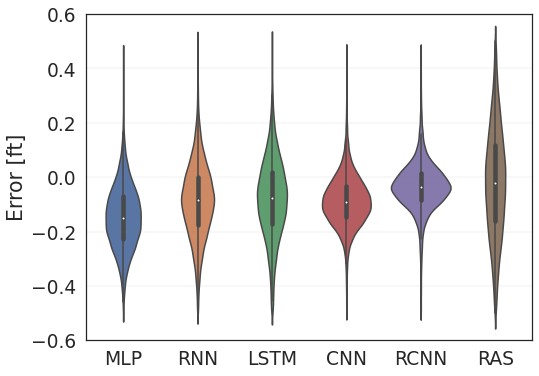

In [268]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']

vp_dict = {column: vp[(vp[column] >= -0.5) & (vp[column] <= 0.5)][column] for column in columns}
# vv_dict

plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=[vp_dict['MLP'], vp_dict['RNN'], vp_dict['LSTM'], 
                          vp_dict['CNN'], vp_dict['RCNN'], vp_dict['RAS']
                         ], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('24 hour ahead at S1', size = 24)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels(columns)  # Provide the correct number of labels

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
scatter_fig.savefig("figure/6.1_shrink.png", dpi=200, bbox_inches='tight')

In [214]:
p_values_ras(vp)

ras_mlp: 0.0
ras_rnn: 4.488906255662819e-245
ras_lstm: 8.754358640029842e-205
ras_cnn: 7.311311073279708e-289
ras_rcnn: 1.0136234158309521e-11
Averaging all: -0.07967451959631774


In [215]:
p_values_ras_wilcoxon(vp)

ras_mlp: 0.0
ras_rnn: 1.8680891325862295e-188
ras_lstm: 5.562499517679578e-168
ras_cnn: 1.053285590839561e-237
ras_rcnn: 6.657557403578813e-11
Averaging all: -0.07967451959631774


In [216]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']
for i in range(len(columns)):
    print('{} median:'.format(columns[i]), np.median(vp.iloc[:, i]))

MLP median: -0.1485088000000001
RNN median: -0.08651589999999998
LSTM median: -0.0799330899999999
CNN median: -0.0910197564999999
RCNN median: -0.034978500000000246
RAS median: -0.020000000000000018


/tmp/ipykernel_10249/2900433598.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vp1.iloc[:, 1] = rnn_1920_error24[:, 1]
/tmp/ipykernel_10249/2900433598.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vp1.iloc[:, 2] = lstm_1920_error24[:, 1]
/tmp/ipykernel_10249/2900433598.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i

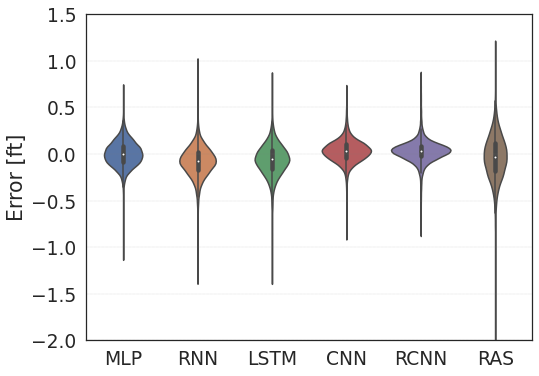

In [218]:
vp1 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
vp1.iloc[:, 0] = mlp_1920_error24[:, 1]
vp1.iloc[:, 1] = rnn_1920_error24[:, 1]
vp1.iloc[:, 2] = lstm_1920_error24[:, 1]
vp1.iloc[:, 3] = conv_mlp_1920_error24[:, 1]
vp1.iloc[:, 4] = conv_rnn_1920_error24[:, 1]
vp1.iloc[:, 5] = ras_1920_error24[:, 1]

sns.set(style = 'white')
sns.set_theme(style="white", font_scale=1.7)
ax = sns.violinplot(data=vp1[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']], inner='box') # data could be one col or multi cols
# ax.set_title('24 hour ahead at S25A', size = 24)
ax.set_ylabel("Error [ft]")
ax.set_ylim(-2, 1.5)

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-2, color='gray', linestyle='--', linewidth=0.15)

scatter_fig = ax.get_figure()
scatter_fig.savefig("figure/6.2.png", dpi=200, bbox_inches='tight')

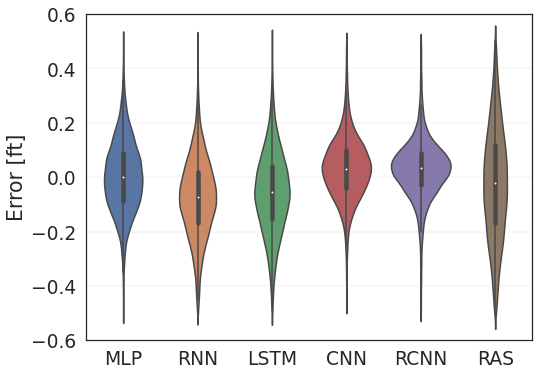

In [274]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']

vp1_dict = {column: vp1[(vp1[column] >= -0.5) & (vp1[column] <= 0.5)][column] for column in columns}
# vv_dict

plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=[vp1_dict['MLP'], vp1_dict['RNN'], vp1_dict['LSTM'], 
                          vp1_dict['CNN'], vp1_dict['RCNN'], vp1_dict['RAS']
                         ], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('24 hour ahead at S25A', size = 24)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels(columns)  # Provide the correct number of labels

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
scatter_fig.savefig("figure/6.2_shrink.png", dpi=200, bbox_inches='tight')

In [221]:
p_values_ras(vp1)

ras_mlp: 1.0474099359178612e-50
ras_rnn: 1.124308781679117e-135
ras_lstm: 8.852295094958101e-55
ras_cnn: 1.0686258784202547e-208
ras_rcnn: 2.081640650381253e-206
Averaging all: -0.018560143090130363


In [222]:
p_values_ras_wilcoxon(vp1)

ras_mlp: 5.574683895675157e-38
ras_rnn: 7.964676631422944e-114
ras_lstm: 1.004831391204109e-37
ras_cnn: 2.6387869815139985e-196
ras_rcnn: 6.799079875729937e-182
Averaging all: -0.018560143090130363


In [223]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']
for i in range(len(columns)):
    print('{} median:'.format(columns[i]), np.median(vp1.iloc[:, i]))

MLP median: -0.0002573000000003489
RNN median: -0.07567199999999974
LSTM median: -0.057891299999999646
CNN median: 0.03147019999999989
RCNN median: 0.03336080000000008
RAS median: -0.02999999999999997


/tmp/ipykernel_10249/2061184701.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vp2.iloc[:, 1] = rnn_1920_error24[:, 2]
/tmp/ipykernel_10249/2061184701.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vp2.iloc[:, 2] = lstm_1920_error24[:, 2]
/tmp/ipykernel_10249/2061184701.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i

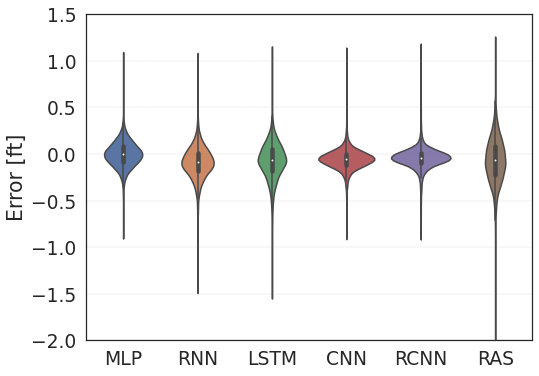

In [226]:
vp2 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
vp2.iloc[:, 0] = mlp_1920_error24[:, 2]
vp2.iloc[:, 1] = rnn_1920_error24[:, 2]
vp2.iloc[:, 2] = lstm_1920_error24[:, 2]
vp2.iloc[:, 3] = conv_mlp_1920_error24[:, 2]
vp2.iloc[:, 4] = conv_rnn_1920_error24[:, 2]
vp2.iloc[:, 5] = ras_1920_error24[:, 2]

sns.set(style = 'white')
sns.set_theme(style="white", font_scale=1.7)
ax = sns.violinplot(data=vp2[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']], inner='box') # data could be one col or multi cols
# ax.set_title('24 hour ahead at S25B', size = 24)
ax.set_ylabel("Error [ft]")
ax.set_ylim(-2, 1.5)

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-2, color='gray', linestyle='--', linewidth=0.15)

scatter_fig = ax.get_figure()
scatter_fig.savefig("figure/6.3.png", dpi=200, bbox_inches='tight')

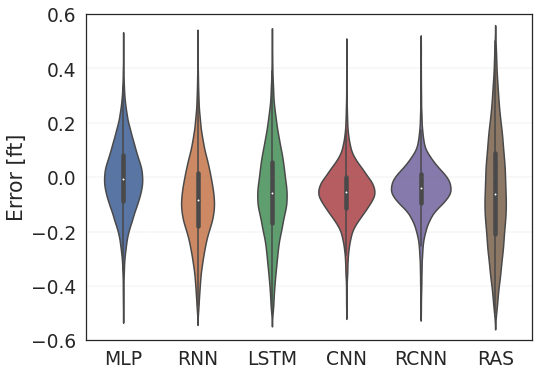

In [271]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']

vp2_dict = {column: vp2[(vp2[column] >= -0.5) & (vp2[column] <= 0.5)][column] for column in columns}
# vv_dict

plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=[vp2_dict['MLP'], vp2_dict['RNN'], vp2_dict['LSTM'], 
                          vp2_dict['CNN'], vp2_dict['RCNN'], vp2_dict['RAS']
                         ], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('24 hour ahead at S25B', size = 24)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels(columns)  # Provide the correct number of labels

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
scatter_fig.savefig("figure/6.3_shrink.png", dpi=200, bbox_inches='tight')

In [229]:
p_values_ras(vp2)

ras_mlp: 3.9608570743638584e-201
ras_rnn: 3.0022530645192457e-22
ras_lstm: 0.5600555834412444
ras_cnn: 9.318430638609981e-09
ras_rcnn: 1.505604271124241e-35
Averaging all: -0.05785783870815633


In [230]:
p_values_ras_wilcoxon(vp2)

ras_mlp: 1.5820981009740601e-174
ras_rnn: 1.382916431052038e-21
ras_lstm: 0.2790316724087688
ras_cnn: 4.959857978909107e-10
ras_rcnn: 1.1547306518842977e-38
Averaging all: -0.05785783870815633


In [231]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']
for i in range(len(columns)):
    print('{} median:'.format(columns[i]), np.median(vp2.iloc[:, i]))

MLP median: -0.005477200000000071
RNN median: -0.08789069999999999
LSTM median: -0.06460580000000005
CNN median: -0.05514840000000021
RCNN median: -0.04119240000000002
RAS median: -0.07


/tmp/ipykernel_10249/3025335771.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vp3.iloc[:, 1] = rnn_1920_error24[:, 3]
/tmp/ipykernel_10249/3025335771.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  vp3.iloc[:, 2] = lstm_1920_error24[:, 3]
/tmp/ipykernel_10249/3025335771.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i

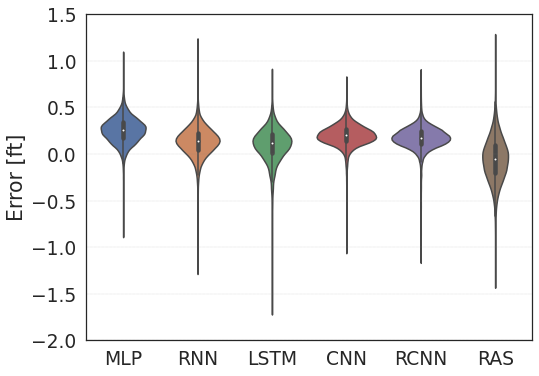

In [232]:
vp3 = pd.DataFrame(columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS'])
vp3.iloc[:, 0] = mlp_1920_error24[:, 3]
vp3.iloc[:, 1] = rnn_1920_error24[:, 3]
vp3.iloc[:, 2] = lstm_1920_error24[:, 3]
vp3.iloc[:, 3] = conv_mlp_1920_error24[:, 3]
vp3.iloc[:, 4] = conv_rnn_1920_error24[:, 3]
vp3.iloc[:, 5] = ras_1920_error24[:, 3]

sns.set(style = 'white')
sns.set_theme(style="white", font_scale=1.7)
ax = sns.violinplot(data=vp3[['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']], inner='box') # data could be one col or multi cols
# ax.set_title('24 hour ahead at S26', size = 24)
ax.set_ylabel("Error [ft]")
ax.set_ylim(-2, 1.5)

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=1.5, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-2, color='gray', linestyle='--', linewidth=0.15)

scatter_fig = ax.get_figure()
scatter_fig.savefig("figure/6.4.png", dpi=200, bbox_inches='tight')

In [187]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']

vp3_dict = {column: vp3[(vp3[column] >= -0.5) & (vp3[column] <= 0.5)][column] for column in columns}
# vv3_dict

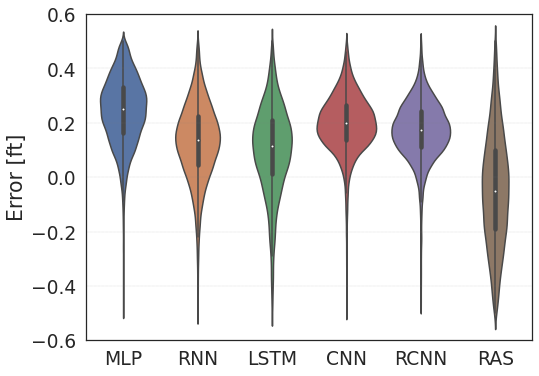

In [273]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']

vp3_dict = {column: vp3[(vp3[column] >= -0.5) & (vp3[column] <= 0.5)][column] for column in columns}
# vv_dict

plt.rcParams["figure.figsize"] = (8, 6)

sns.set(style = 'white') # {darkgrid, whitegrid, dark, white, ticks}
sns.set_theme(style="white", font_scale=1.7)


ax = sns.violinplot(data=[vp3_dict['MLP'], vp3_dict['RNN'], vp3_dict['LSTM'], 
                          vp3_dict['CNN'], vp3_dict['RCNN'], vp3_dict['RAS']
                         ], inner='box') # data could be one col or multi cols

ax.set_ylabel("Error [ft]")
# ax.set_title('24 hour ahead at S26', size = 24)
ax.set_ylim(-0.6, 0.6)
ax.set_xticklabels(columns)  # Provide the correct number of labels

# Add horizontal lines at y=0, y=1, and y=-1
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.2, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=-0.4, color='gray', linestyle='--', linewidth=0.15)
ax.axhline(y=0.4, color='gray', linestyle='--', linewidth=0.15)


scatter_fig = ax.get_figure()
scatter_fig.savefig("figure/6.4_shrink.png", dpi=200, bbox_inches='tight')

In [189]:
p_values_ras(vp3)

ras_mlp: 0.0
ras_rnn: 0.0
ras_lstm: 0.0
ras_cnn: 0.0
ras_rcnn: 0.0
Averaging all: 0.13340630423133165


In [190]:
columns = ['MLP', 'RNN', 'LSTM', 'CNN', 'RCNN', 'RAS']
for i in range(len(columns)):
    print('{} median:'.format(columns[i]), np.median(vp3.iloc[:, i]))

MLP median: 0.25626630000000006
RNN median: 0.13911320000000016
LSTM median: 0.11584994999999987
CNN median: 0.19892240000000028
RCNN median: 0.1755354999999994
RAS median: -0.050000000000000044


In [191]:
p_values_ras_wilcoxon(vp3)

ras_mlp: 0.0
ras_rnn: 0.0
ras_lstm: 0.0
ras_cnn: 0.0
ras_rcnn: 0.0
Averaging all: 0.13340630423133165
